In [11]:
%run GeneticAlgorithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools

In [12]:
# Define parameter ranges
num_of_nodes = [50, 100]
edge_existence_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
num_iters = [10, 15, 20]
elitism_sizes = [2, 5]
mutation_probs = [0.1, 0.2]
population_sizes = [20, 30]
tournament_sizes = [5, 10]

# Generate all combinations
parameter_grid = list(itertools.product(num_of_nodes, edge_existence_probs, num_iters,
                                        elitism_sizes, mutation_probs, population_sizes, tournament_sizes))

# Results storage
results = []

In [13]:
# Test all combinations
for params in parameter_grid:
    nodes, prob, iters, elitism, mutation_prob, pop_size, tour_size = params
    graph = nx.erdos_renyi_graph(nodes, prob)
    
    # Ensure graph is connected
    while not nx.is_connected(graph):
        graph = nx.erdos_renyi_graph(nodes, prob)
    
    # Run GA
    start_time = time.time()
    best_solution = ga(graph, iters, elitism, mutation_prob, pop_size, tour_size)
    end_time = time.time()
    
    # Store results
    execution_time = timedelta(seconds=end_time - start_time)
    results.append({
        "params": params,
        "execution_time": execution_time,
        "fitness": best_solution.fitness
    })

In [14]:
# Analyze results
sorted_results = sorted(results, key=lambda x: x["fitness"], reverse=True)
for result in sorted_results:
    print(result)

{'params': (100, 0.7, 15, 2, 0.2, 30, 10), 'execution_time': datetime.timedelta(seconds=1, microseconds=457017), 'fitness': 97}
{'params': (100, 0.6, 10, 5, 0.1, 30, 5), 'execution_time': datetime.timedelta(microseconds=938509), 'fitness': 96}
{'params': (100, 0.6, 15, 5, 0.1, 20, 5), 'execution_time': datetime.timedelta(microseconds=528581), 'fitness': 96}
{'params': (100, 0.6, 15, 5, 0.1, 30, 10), 'execution_time': datetime.timedelta(seconds=1, microseconds=113354), 'fitness': 96}
{'params': (100, 0.6, 20, 2, 0.2, 30, 5), 'execution_time': datetime.timedelta(seconds=1, microseconds=88687), 'fitness': 96}
{'params': (100, 0.7, 10, 2, 0.1, 20, 5), 'execution_time': datetime.timedelta(microseconds=551816), 'fitness': 96}
{'params': (100, 0.7, 10, 2, 0.1, 20, 10), 'execution_time': datetime.timedelta(microseconds=702197), 'fitness': 96}
{'params': (100, 0.7, 10, 2, 0.1, 30, 10), 'execution_time': datetime.timedelta(seconds=1, microseconds=149905), 'fitness': 96}
{'params': (100, 0.7, 10,

In [15]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    print(f"\n\nTesting a {num_of_nodes} nodes graph...")
    graph = nx.complete_graph(num_of_nodes)
    
    graph = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(graph):
        graph = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
        
    start_time = time.time()
    best_solution = ga(graph, num_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    print(f"Execution time: {timedelta(seconds=end_time-start_time)}")
    print("Number of leaves:", best_solution.fitness)
    
    G = Graph()
    G.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in G.nodes():
        if G.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(graph, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(G, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum leaf spanning tree")

    plt.tight_layout()
    plt.show()




Testing a 50 nodes graph...
Execution time: 0:00:00.240236
Number of leaves: 45


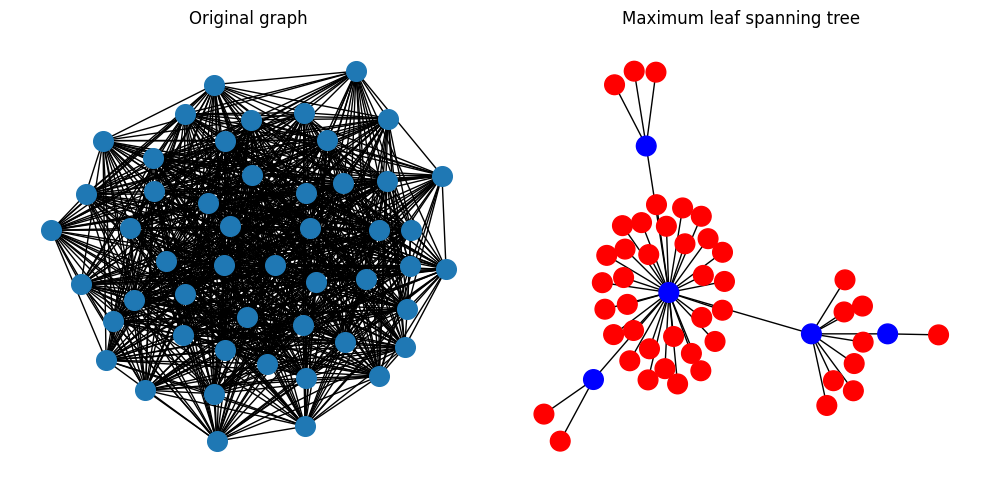

In [16]:
test_graph(50, 0.7, 10, 5, 0.1, 20, 5)



Testing a 100 nodes graph...
Execution time: 0:00:01.231300
Number of leaves: 96


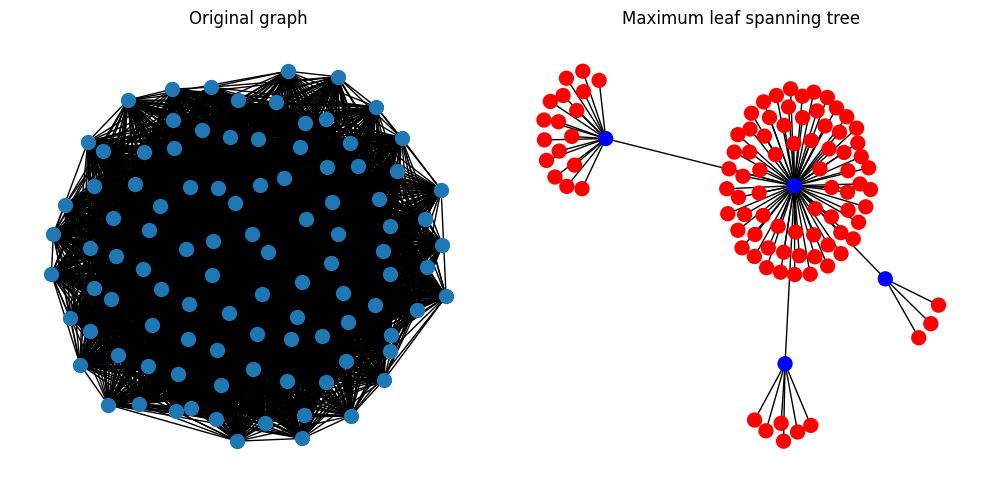

In [17]:
test_graph(100, 0.7, 15, 2, 0.2, 30, 10)